In [50]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import pandas as pd

In [51]:
dataset_train = pd.read_csv('Walmart_Stock_Price_Train.csv')
dataset_train.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2715,10/13/17,86.239998,86.949997,86.239998,86.620003,86.165894,9389000
2716,10/16/17,86.580002,86.620003,85.019997,85.739998,85.290497,9300300
2717,10/17/17,85.500000,86.360001,85.320000,85.980003,85.529243,5851500
2718,10/18/17,86.150002,86.370003,86.010002,86.220001,85.767982,5472100
2719,10/19/17,86.150002,86.660004,85.769997,86.400002,85.947044,7029000


In [52]:
training_set = dataset_train.iloc[:,5:6].values
# adding the : makes this a 2-dimensional numpy array instead of a vector
training_set[0]

array([ 36.573868])

In [53]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(training_set)

Using the previous 120 days as inputs into the Recurrent Neural Network

In [54]:
# Creating a data structure with 120 timesteps and 1 output
X_train = []
y_train = []

for i in range(120,2720):
    X_train.append(training_set_scaled[i-120:i,0])
    y_train.append(training_set_scaled[i,0])

In [55]:
#into a numpy array
X_train,y_train = np.array(X_train), np.array(y_train)

In [56]:
# Reshaping
# we want to make sure it is a 3-D tensor. 
#First input is the shape of the rows in the np array. 
#second input is shape of the columns in the np array  
# and the third is any additional factors, perhaps the closing stock price. 
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [12]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [57]:
# Initialising the RNN
regressor = Sequential()

In [58]:
# Adding the input layer and the LSTM layer and Dropout regularization
# units = neurons in the layer
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [59]:
# Adding the second LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

In [60]:
# Adding the third LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

In [61]:
# Adding the fourth LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 100))
regressor.add(Dropout(0.2))

In [62]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [63]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [64]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 32, epochs = 50)

Epoch 1/50
2600/2600 [==============================] - 87s - loss: 0.0149    
Epoch 2/50
2600/2600 [==============================] - 82s - loss: 0.0027    
Epoch 3/50
2600/2600 [==============================] - 81s - loss: 0.0026    
Epoch 4/50
2600/2600 [==============================] - 82s - loss: 0.0020    
Epoch 5/50
2600/2600 [==============================] - 82s - loss: 0.0023    
Epoch 6/50
2600/2600 [==============================] - 82s - loss: 0.0022    
Epoch 7/50
2600/2600 [==============================] - 81s - loss: 0.0019    
Epoch 8/50
2600/2600 [==============================] - 82s - loss: 0.0017    
Epoch 9/50
2600/2600 [==============================] - 410s - loss: 0.0018   
Epoch 10/50
2600/2600 [==============================] - 82s - loss: 0.0021    
Epoch 11/50
2600/2600 [==============================] - 81s - loss: 0.0016    
Epoch 12/50
2600/2600 [==============================] - 81s - loss: 0.0015    
Epoch 13/50
2600/2600 [==========================

In [65]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('Walmart_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:,5:6].values

In [66]:
test_set = dataset_test.iloc[:,5:6].values
# adding the : makes this a 2-dimensional numpy array instead of a vector
test_set[0]

array([ 86.98159])

In [71]:
# Getting the predicted stock price of end of 2017
dataset_total = pd.concat((dataset_train['Adj Close'], dataset_test['Adj Close']),axis=0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-120:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
inputs[0]

array([ 0.77420865])

In [72]:
# Creating a data structure with 120 timesteps and 1 output
X_test = []

for i in range(120,165):
    X_test.append(inputs[i-120:i,0])
    
#into a numpy array
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [73]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

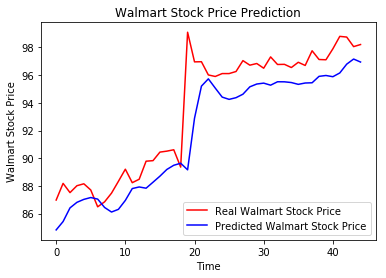

In [74]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Walmart Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Walmart Stock Price')
plt.title('Walmart Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Walmart Stock Price')
plt.legend();